# MacArthur's consumer-resource Model

The MacArthur's consumer-resource model (MacArthur 1969) can be described by following differential equation system:

\begin{align}
\frac{dX_i}{dt} &= c_iX_i \ (\sum_{j}w_ja_{ij}R_j - T_i) \\
\frac{dR_j}{dt} &= h(R_j) - \sum_{k}a_{kj}X_kR_j
\end{align}

- $X_i$ : abundance of species i

- $R_j$ : abundance of resource j

- $w_j$ : weight of resource j

- $a_{ij} \quad (=a_{kj})$ : probability per unit time that individual (i/k) encounters and eats a given resource j (must sum up to one when summation is over columns)

- $c_i$ : constant proportionality term, governing conversion of resources into species i

- $T_i$ : threshold for production of available food below which abundance of species i decreases (maintenance term)


The function $h(R_j)$ represents the dynamic of the resource without species. This can be for example the logistic rate equation :

\begin{equation}
h(R_j) = \frac{r_jR_j}{K_j} \ [K_j - R_j] = r_jR_j \ (1-\frac{R_j}{K_j})
\end{equation}

The model is written in index notation. This means for example that 

$\sum_{j}a_{ij}R_j$ denotes following:

To each column $j$ of the matrix $a$ multiply the corresponding $j^{th}$ element of the vector $R_j$ and sum up all columns of the resulting matrix.

In [1]:
# Example

import numpy as np

a = np.array([[1,2,3],
             [4,5,6],
             [1,1,2],
             [4,5,6]])

R = np.array([1,2,3])

print(a*R)   #jede Zeile von a wird mit jeder Zeile von R multipliziert

print(np.sum(a*R,axis=1))    #jeder Multiplikationsschritt aus der jeweiligen Zeile des Produktes aus a*R wird addiert
                                # liegt daran, dass axis=1 ist. Wäre axis=0, dann wird jede Spalte zusammenaddiert

[[ 1  4  9]
 [ 4 10 18]
 [ 1  2  6]
 [ 4 10 18]]
[14 32  9 32]


$\sum_{k}a_{kj}X_kR_j$ means:

for each row $k$ in the matrix $a$ multiply the $k^{th}$ element of the vector $X$ and to each column $j$ multiply the $j^{th}$ element of vector $R$. Sum over all rows of the resulting matrix 

In [2]:
# Example

a = np.array([[1,2,3],
             [4,5,6],
             [1,1,2],
             [4,5,6]])

R = np.array([1,2,3])
X = np.array([1,5,3,4])

#there are several possible ways to do this

#1 Way
m1 = (a*R) 
m2 = (m1.T*X).T

print('Way 1 \n')
print(m1)
print('\n')
print(m2)
print('\n')
print(np.sum(m2,axis=0))

#2 Way: Using dot product


m1 = (a*R).T
m2 = m1.dot(X)
print('\n Way 2 \n')
print(m1)
print('\n')
print(m2)

#This can be done in one single step
m3 = (a*R).T.dot(X)
print('\n')
print(m3)

Way 1 

[[ 1  4  9]
 [ 4 10 18]
 [ 1  2  6]
 [ 4 10 18]]


[[ 1  4  9]
 [20 50 90]
 [ 3  6 18]
 [16 40 72]]


[ 40 100 189]

 Way 2 

[[ 1  4  1  4]
 [ 4 10  2 10]
 [ 9 18  6 18]]


[ 40 100 189]


[ 40 100 189]


 You can also use the einsum function from numpy to multiply vectors or matrices using the index notation. For more infos look at the numpy documentation

In [3]:
np.einsum('kj,k,j -> j',a,X,R)

array([ 40, 100, 189])

## Implementing the MacArthur Consumer-Resource Model as simple function

Imagine we have a 5 species, 3 resources microbial community. Let's choose some random parameters and for $h(R_j)$ the logistic equation



[[0.81 0.04 0.15]
 [0.43 0.38 0.19]
 [0.   0.57 0.43]
 [0.   0.   1.  ]
 [0.74 0.01 0.25]]


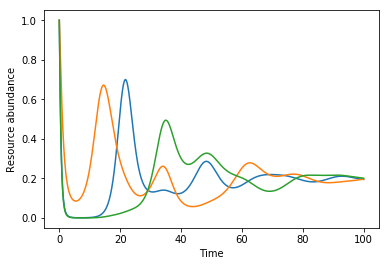

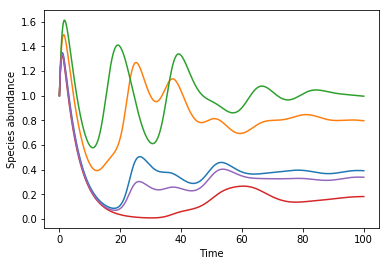

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from functools import partial
%matplotlib inline


#metaparameter
number_species = 5
number_resources = 3


#species definition matrix 
a=[]
for i in range(5):            # 5 für die Anzahl der Spezies 
    b = []
                                                                                          
     
    random_number = np.random.randint(10)   
    if random_number != 1:                                                                                                       # a = np.array([      <- Originalwerte
        while True:                                                                                                              # [0.15,0.85,0],
            k=(np.random.randint(0,100,3))/100        # 3 für die Anzahl der Ressourcen, auf die die Spezies zugreifen können    # [0.5,0.25,0.25],
            if np.sum(k)==1.0:                                                                                                   # [0.7,0.2,0.1],
                a.append(k)                                                                                                      # [0.1,0.3,0.6],
                break                                                                                                            # [1,0,0]])
    else:

        random_number2 = np.random.randint(3)        # Zahl 3 dient nur für die Auswahl der Bedingungen
        if random_number2 == 0:
            b.append(1.00)
            b.append(0.)
            b.append(0.)

        elif random_number2 == 1:
            b.append(0.)
            b.append(1.00)
            b.append(0.)

        elif random_number2 == 2:
            b.append(0.)
            b.append(0.)
            b.append(1.00)
        b = np.array(b) 
        a.append(b)
a=np.array(a)
print(a)

#Resource parameters
w = np.repeat(1,3) #+ np.random.random(3)

r = np.repeat(1,3) 
K = np.repeat(2,3) 

#Species parameters
T = np.repeat(0.2,5) 
c = np.repeat(1,5)           

#h function
def h(R):
    h = r*R/K * (K - R)
    return h

#model
def mcr(t,y,w,c,r,K,T,a):
    X = y[:number_species]
    R = y[number_species:]
    dXdt = c*X*(np.sum(w*a*R,axis=1) - T)
    dRdt = h(R) - (a*R).T.dot(X)
    output = np.concatenate((dXdt,dRdt),axis=None)
    return output
    
#Initial values
R0 = np.repeat(1,3)
X0 = np.repeat(1,5)
y0 = np.concatenate((X0,R0),axis=None)

#Time
t = np.linspace(0,100,1000)

#Integration function
def timecourse(sys, y, t):
    integ = ode(sys).set_integrator('lsoda').set_initial_value(y,0)
    cnt = 1
    sol = [y]
    while cnt < len(t):
        sol.append(integ.integrate(t[cnt]))
        cnt += 1
    return np.array(sol)

system = partial(mcr, w=w, c=c, r=r, K=K, T=T, a=a)
sol = timecourse(system, y0, t)

#print(w.shape,a.shape)
#print("Test",R.shape)
plt.plot(t,sol[:,number_species:])
plt.xlabel('Time')
plt.ylabel('Resource abundance')
plt.show()
plt.plot(t,sol[:,:number_species])
plt.xlabel('Time')
plt.ylabel('Species abundance')
plt.show()

# TASK 1

Play with the parameters! So far most parameters are the same for all resources and all consumers; change this! Add random noise to the parameters (+np.random.random(number of entries)).
The 'a' matrix contains the species definition (each species is a row in the 'a' matrix). The more a species prefer a resource, the higher the probability of encounter. This means a species with a entry in 'a' of [1,0,0] would only consume one resource (specialist), while a species with [0.3333,0.3333,0.3333] would consume all available resources (generalist). Play with the 'a' matrix and see what happens.

Create a function that has as input the number of species/consumers and resources in the system and as output a dictionary containing the parameters. 

It should look similar to:

```def get_parameters(number_species, number_resources):...return parameter_dict```

here parameter_dict should look similar to:

```parameter_dict = {'w':[1,1,1], 'c':[1,1,1], ...  } ```

In [9]:
#YOUR CODE

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from functools import partial
%matplotlib inline

def get_parameters (number_species, number_resources):
    
    """ Funktion soll am Ende ein Dictionary bekommen, welcher zufällige Werte beinhaltet, die zu den jeweiligen Parametern zugeordnet sind. 
    Die Anzahl der Werte der jeweiligen Parametern wird durch die Eingabe 'number_resources' und 'number_species' bestimmt. """
    
    parameter_dict={}
    liste_parameter = []
    for i in ["w","r","K"]:
        parameter_dict[i] = np.repeat(1,number_resources)
            
    parameter_dict["T"] = np.repeat(0.2,number_species)
    parameter_dict["c"] = np.repeat(1,number_species)
    
    parameter_dict["number_species"] = len(parameter_dict["c"])
    parameter_dict["number_resources"] = len(parameter_dict["w"])
        
    return parameter_dict

print(get_parameters(5,3))

{'w': array([1, 1, 1]), 'r': array([1, 1, 1]), 'K': array([1, 1, 1]), 'T': array([0.2, 0.2, 0.2, 0.2, 0.2]), 'c': array([1, 1, 1, 1, 1]), 'number_species': 5, 'number_resources': 3}


## Implementing the MacArthur Consumer-Resource Model as class

Normally we would not implement a model as a simple function but as class. Please read the following tutorial from the official python documentation https://docs.python.org/3.6/tutorial/classes.html

As an example the Lotka-Volterra system is implemented as class below

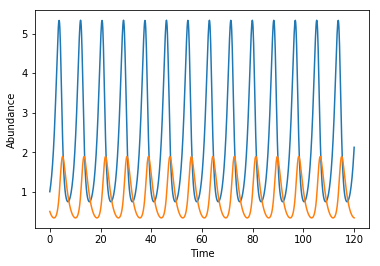

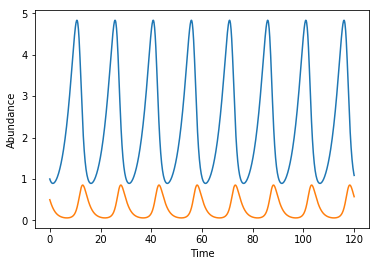

In [6]:
class LV:
    
    p = {'r1':0.9,'r2':0.7,'C1':1,'C2':0.3}
        
    def system(self,t,initial):
        x,y = initial
        dXdt = self.p['r1'] * x - self.p['C1'] * x * y
        dYdt = self.p['C2'] *x*y - self.p['r2'] * y
        return [dXdt, dYdt]
    
    def timecourse(self, y, t):
        integ = ode(self.system).set_integrator('lsoda').set_initial_value(y,0)
        cnt = 1
        sol = [y]
        while cnt < len(t):
            sol.append(integ.integrate(t[cnt]))
            cnt += 1
        return np.array(sol)
    
    
model = LV()
y0 = [1,0.5]
t = np.linspace(0,120,1000)
sol = model.timecourse(y0,t)
plt.plot(t,sol)
plt.xlabel('Time')
plt.ylabel('Abundance')
plt.show()

# A parameter can now be simply changed in following way 
model.p['r1'] = 0.3
sol = model.timecourse(y0,t)
plt.plot(t,sol)
plt.xlabel('Time')
plt.ylabel('Abundance')
plt.show()

# TASK 2
Try to implement the MacArthur consumer-resource model as class. Do not forget to include information in the system about how much species and resources it contains (number_species, number_resources). You can include this information in the parameter dictionary or in an own metaparameter dictionary.

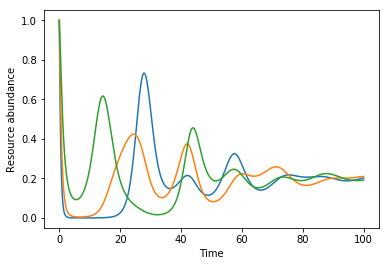

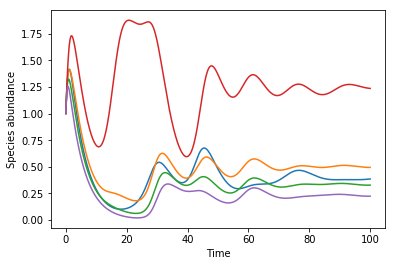

In [7]:
#YOUR CODE

class MacArther_C_R():
    
    #metaparameter
    parameter = {"number_species": 5, "number_resources": 3}

    #h function
    def h(self, R):
        h = r*R/K * (K - R)
        return h

    #model
    def mcr(self, t,y,w,c,r,K,T,a):
        X = y[:self.parameter["number_species"]]
        R = y[self.parameter["number_species"]:]
        dXdt = c*X*(np.sum(w*a*R,axis=1) - T)
        dRdt = h(R) - (a*R).T.dot(X)
        output = np.concatenate((dXdt,dRdt),axis=None)
        return output
    
    #Integration function
    def timecourse(self, sys, y, t):
        integ = ode(system).set_integrator('lsoda').set_initial_value(y,0)            #bei LV war bei ode "self.system" 
        cnt = 1
        sol = [y]
        while cnt < len(t):
            sol.append(integ.integrate(t[cnt]))
            cnt += 1
        return np.array(sol)
    
a = np.array([                                                              
[0.15,0.85,0],
[0.5,0.25,0.25],
[0.7,0.2,0.1],
[0.1,0.3,0.6],
[1,0,0]])

w = np.repeat(1,3)
r = np.repeat(1,3) 
K = np.repeat(2,3) 

#Species parameters
T = np.repeat(0.2,5) 
c = np.repeat(1,5) 

#Initial values
R0 = np.repeat(1,3)
X0 = np.repeat(1,5)
y0 = np.concatenate((X0,R0),axis=None)

#Time
t = np.linspace(0,100,1000)

Task2 = MacArther_C_R()

system = partial(Task2.mcr, w=w, c=c, r=r, K=K, T=T, a=a)
sol = Task2.timecourse(system, y0, t)

plt.plot(t,sol[:,Task2.parameter["number_species"]:])
plt.xlabel('Time')
plt.ylabel('Resource abundance')
plt.show()
plt.plot(t,sol[:,:Task2.parameter["number_species"]])
plt.xlabel('Time')
plt.ylabel('Species abundance')
plt.show()



## Class and the init function

It is possible to construct a class that gets its parameters when first called. Therefore, one needs the '__init__' function. Let's try to do it with the LV class

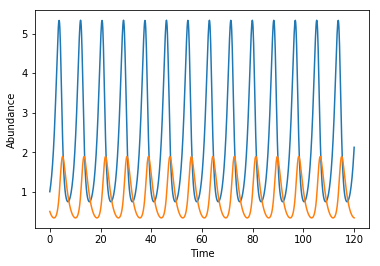

{'r1': 0.3, 'r2': 0.7, 'C1': 1, 'C2': 0.3}


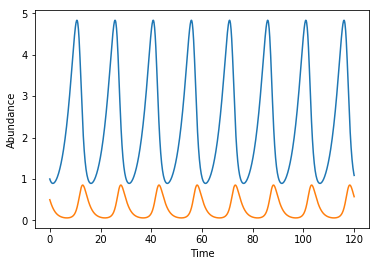

In [8]:
# Example

class LV2:
    
    def __init__(self, parameter): #when using the function the first time it asks for parameters
        self.p = parameter
        
    def system(self,t,initial):
        x,y = initial
        dXdt = self.p['r1'] * x - self.p['C1'] * x * y
        dYdt = self.p['C2'] *x*y - self.p['r2'] * y
        return [dXdt, dYdt]
    
    def timecourse(self, y, t):
        integ = ode(self.system).set_integrator('lsoda').set_initial_value(y,0)
        cnt = 1
        sol = [y]
        while cnt < len(t):
            sol.append(integ.integrate(t[cnt]))
            cnt += 1
        return np.array(sol)

    
parameter_1 = {'r1':0.9,'r2':0.7,'C1':1,'C2':0.3}
        

model_2 = LV2(parameter_1) #give the class parameters which are saved in self.p
y0 = [1,0.5]
t = np.linspace(0,120,1000)
sol = model_2.timecourse(y0,t)
plt.xlabel('Time')
plt.ylabel('Abundance')
plt.plot(t,sol)
plt.show()

#Also here it is possible to change the parameters 
model_2.p['r1'] = 0.3
print(model_2.p)

sol = model_2.timecourse(y0,t)
plt.plot(t,sol)
plt.xlabel('Time')
plt.ylabel('Abundance')
plt.show()

# TASK 3

Modify your MacArthur consumer-resource class such that it takes a parameter dictionary as input. Simulate a microbial community with 40 resources and 30 species. To create the necessary parameter dictionary use the function you implemented in Task 1.

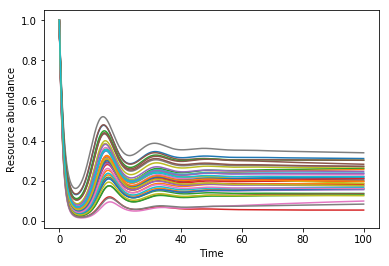

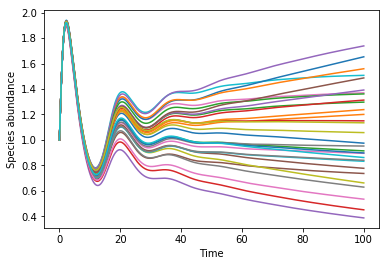

In [12]:
#YOUR CODE
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from functools import partial
import random
%matplotlib inline


def create_parameter (number_species, number_resources):
    
    """ Funktion soll am Ende ein Dictionary bekommen, welcher zufällige Werte beinhaltet, die zu den jeweiligen Parametern zugeordnet sind. 
    Die Anzahl der Werte der jeweiligen Parametern wird durch die Eingabe 'number_resources' und 'number_species' bestimmt. Im Gegensatz zu der Funktion
    'get_parameters' beinhaltet diese Funktion auch die Matrix a, die mit Zufallswerte gefüllt ist."""
    
    parameter_dict={}
    liste_parameter = []
    for i in ["w","r","K"]:
        parameter_dict[i] = np.repeat(1,number_resources)
            
    parameter_dict["T"] = np.repeat(0.2,number_species)
    parameter_dict["c"] = np.repeat(1,number_species)
    
    parameter_dict["number_species"] = len(parameter_dict["c"])
    parameter_dict["number_resources"] = len(parameter_dict["w"])
    
    a = np.random.rand(number_species,number_resources)
    a = a/a.sum(axis=1,keepdims=1)
    
    parameter_dict["a"] = a   
    
    return parameter_dict



class MacArther_C_R_2:
   
    def __init__(self, dict_parameter): #when using the function the first time it asks for parameters
        self.dict_parameter = dict_parameter
        self.number_species = dict_parameter["number_species"]
        self.number_resources = dict_parameter["number_resources"]
        self.T = dict_parameter["T"]
        self.c = dict_parameter["c"]
        self.w = dict_parameter["w"]
        self.r = dict_parameter["r"]
        self.K = dict_parameter["K"]
    
        #a = np.random.rand(self.number_species, self.number_resources)
        #self.a = a/a.sum(axis=1,keepdims=1)
        self.a = dict_parameter["a"]
    

    #h function
    def h(self, R):
        h = self.r * R / self.K * (self.K - R)
        return h

    #model
    def mcr(self, t,y):        # andere Parameter werden durch self aufgerufen
        X = y[:self.number_species]                            
        R = y[self.number_species:]
        dXdt = self.c*X*(np.sum(self.w*self.a*R,axis=1) - self.T)
        dRdt = self.h(R) - (self.a*R).T.dot(X)
        output = np.concatenate((dXdt,dRdt),axis=None)
        return output
    
    #Integration function
    def timecourse(self, y, t):
        integ = ode(self.mcr).set_integrator('lsoda').set_initial_value(y,0)            
        cnt = 1
        sol = [y]
        while cnt < len(t):
            sol.append(integ.integrate(t[cnt]))
            cnt += 1
        return np.array(sol)

    
R = np.array(range(1,41))   # wird ignoriert ?

#Initial values





t = np.linspace(0,100,1000)


Task3 = MacArther_C_R_2(create_parameter(30,40))   #30 Spezies und 40 Ressourcen

R0 = np.repeat(1,Task3.number_resources)
X0 = np.repeat(1,Task3.number_species)
y0 = np.concatenate((X0,R0),axis=None)


sol = Task3.timecourse(y0, t)



plt.plot(t,sol[:,Task3.number_species:])
plt.xlabel('Time')
plt.ylabel('Resource abundance')
plt.show()
plt.plot(t,sol[:,:Task3.number_species])
plt.xlabel('Time')
plt.ylabel('Species abundance')
plt.show()    

   

In [11]:


def expand_system(system,anzahl=1):
    
    """ Diese Funktion soll lediglich nur die Speziesparameter, die in der Klasse MacArther_C_R_2 abgespeichert sind, entsprechend erweitern. 
    Das Argument 'anzahl' dient dazu, die Anzahl an Spezies um den gewünschten Wert zu erweitern. Wenn nichts eingegeben wird, dann wird immer 
    angenommen, dass sich die Anzahl der Spezies um 1 erweitert."""
    
    p = system.dict_parameter.copy()  #shallow copy -> Referenz wird nicht kopiert -> Original wird nicht verändert
    
    p["number_species"] = p["number_species"] + anzahl
    
    for i in (range(anzahl)):
        
        p["T"] = np.append(p["T"],0.2)
        p["c"] = np.append(p["c"],1)
        k = np.random.rand( 1 , p["number_resources"])
        k = k/k.sum(axis=1,keepdims=1)
        p["a"] = np.append(p["a"],k,0)
        
    return p
expand_system(Task3)

{'w': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'r': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'K': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'T': array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
        0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
        0.2, 0.2, 0.2, 0.2, 0.2]),
 'c': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'number_species': 31,
 'number_resources': 40,
 'a': array([[0.03753057, 0.00520228, 0.00923683, ..., 0.00914502, 0.02332229,
         0.00016181],
        [0.00342551, 0.04037992, 0.01281359, ..., 0.0321754 , 0.0267002 ,
         0.0190024 ],
        [0.0315897 , 0.0